# EDA Notebook
this notebook is focusing on understanding the data and its structure. 

> note: for convenience, the first 2 cellblocks are to be seen before the imports, as to avoid running long code by mistake. The data is then saved in a smaller .csv file, which is used for the model training and predictions. 

First version of the model is created for testing purposes. 

Data source: 
https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions?resource=download&select=credit_card_transactions-ibm_v2.csv

In [4]:
# data is too large, for loading on small RAM use chunk
chunk = 10000
dflist = []
for df in pd.read_csv('./data/cc_ibm.csv', chunksize=chunk):
    dflist.append(df)

# create a large dataframe
ibm = pd.concat(dflist)
ibm.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [5]:
years = np.arange(2002, 2021)
dfs = []

# sort out the relevant years: 4 years from the last period
for year in years[13:]:
    df = ibm.loc[ibm['Year'] == year]
    dfs.append(df)


In [6]:
# save it for later (the original file is very large)
data = pd.concat(dfs[-6:])
data.to_csv('ibm_6y.csv', index=False)
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
3895,0,0,2015,1,2,06:58,$34.99,Chip Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3896,0,0,2015,1,2,11:54,$1.67,Chip Transaction,6666504894937430109,La Verne,CA,91750.0,5499,NaN,No
3897,0,0,2015,1,2,20:23,$208.96,Chip Transaction,838425044734233142,Mira Loma,CA,91752.0,4814,NaN,No
3898,0,0,2015,1,4,06:27,$136.58,Chip Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No
3899,0,0,2015,1,4,16:54,$128.64,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('ibm_4y.csv')
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2017,1,3,06:56,$28.06,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,NaN,No
1,0,0,2017,1,4,06:35,$46.07,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No
2,0,0,2017,1,6,05:47,$31.08,Chip Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No
3,0,0,2017,1,7,13:26,$11.48,Chip Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No
4,0,0,2017,1,8,06:37,$39.69,Chip Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


### EDA and Cleaning

MCC codes are four-digit numbers that classify a business by the services it provides or products it sells. If a business has a variety of products or services, the MCC code is usually based on the product or service that makes up the bulk of the business’ sales. (https://www.heartland.us/resources/blog/merchants-guide-to-mcc-codes)

In [3]:
data.rename(str.lower, axis='columns', inplace=True)
data.rename(columns={'use chip': 'use_chip', 
                       'merchant name': 'merchant_name', 
                       'merchant city': 'merchant_city', 
                       'merchant state': 'merchant_state',
                       'errors?': 'errors', 
                       'is fraud?': 'is_fraud' }, 
                       inplace=True)
data.head()


,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,is_fraud
0,0,0,2017,1,3,06:56,$28.06,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,NaN,No
1,0,0,2017,1,4,06:35,$46.07,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No
2,0,0,2017,1,6,05:47,$31.08,Chip Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No
3,0,0,2017,1,7,13:26,$11.48,Chip Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No
4,0,0,2017,1,8,06:37,$39.69,Chip Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [4]:
# set time series index
data[['hour', 'minute']] = data['time'].str.split(':', expand=True)
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute']])
data.set_index('date', inplace=True)
#data.drop(columns=['year', 'month', 'day', 'time', 'hour', 'minute'], inplace=True)

# convert amount to float
data['amount'] = data['amount'].str[1:].astype('float64')
data.head()



,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,is_fraud,hour,minute
date,,,,,,,,,,,,,,,,,
2017-01-03 06:56:00,0,0,2017,1,3,06:56,28.06,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,NaN,No,06,56
2017-01-04 06:35:00,0,0,2017,1,4,06:35,46.07,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,06,35
2017-01-06 05:47:00,0,0,2017,1,6,05:47,31.08,Chip Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No,05,47
2017-01-07 13:26:00,0,0,2017,1,7,13:26,11.48,Chip Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No,13,26
2017-01-08 06:37:00,0,0,2017,1,8,06:37,39.69,Chip Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,06,37


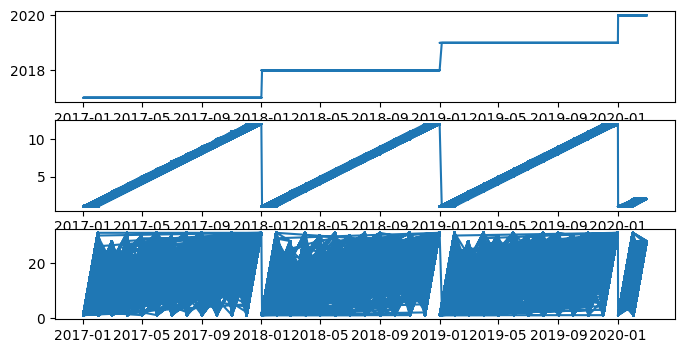

In [5]:
# check that the dates are sequential:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize= (8, 4))
ax1.plot(data['year'])
ax2.plot(data['month'])
ax3.plot(data['day'])


In [5]:
# from the charts, the years and months are sequential, 
# however the dates inside every single month are mixed up. 
data.sort_index(inplace=True)

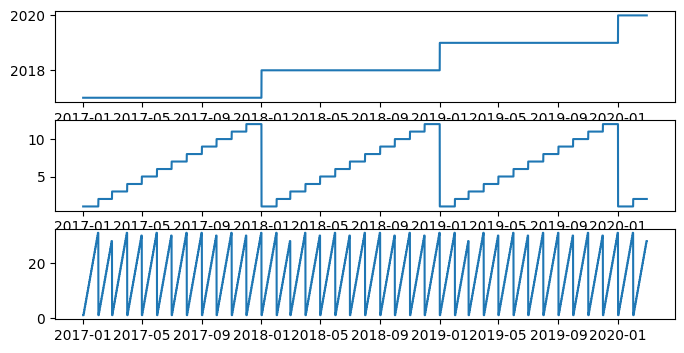

In [7]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize= (8, 4))
ax1.plot(data['year'])
ax2.plot(data['month'])
ax3.plot(data['day'])

In [6]:
data.drop(columns=[ 'time'], inplace=True)
data.isna().sum()

user                    0
card                    0
year                    0
month                   0
day                     0
amount                  0
use_chip                0
merchant_name           0
merchant_city           0
merchant_state     688653
zip                726686
mcc                     0
errors            5418352
is_fraud                0
hour                    0
minute                  0
dtype: int64

In [9]:
# number of fraud transactions: 4,833
data.loc[data['is_fraud'] == 'Yes']

,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,is_fraud,hour,minute
date,,,,,,,,,,,,,,,,,
2017-11-19 12:06:00,3,1,2017,11,19,12:06,9.53,Chip Transaction,3017176960763408508,Rome,Italy,NaN,5921,NaN,Yes,12,06
2017-11-19 12:07:00,3,1,2017,11,19,12:07,510.24,Chip Transaction,-2916542501422915698,Rome,Italy,NaN,5712,NaN,Yes,12,07
2017-11-19 19:30:00,3,1,2017,11,19,19:30,2.52,Chip Transaction,8181289561763813437,Rome,Italy,NaN,5661,NaN,Yes,19,30
2017-11-21 10:53:00,3,1,2017,11,21,10:53,123.07,Chip Transaction,2919745757515313025,Rome,Italy,NaN,5932,NaN,Yes,10,53
2017-11-21 12:40:00,212,0,2017,11,21,12:40,7.60,Chip Transaction,-8291617834869479558,Rome,Italy,NaN,5193,NaN,Yes,12,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-26 15:15:00,1977,0,2019,10,26,15:15,112.44,Chip Transaction,6051395022895754231,Rome,Italy,NaN,5310,NaN,Yes,15,15
2019-10-26 18:14:00,781,0,2019,10,26,18:14,63.50,Chip Transaction,-1642303950890406395,Rome,Italy,NaN,5912,NaN,Yes,18,14
2019-10-27 14:31:00,414,3,2019,10,27,14:31,241.61,Chip Transaction,1715299929786123066,Rome,Italy,NaN,3722,NaN,Yes,14,31


In [7]:
# many missing values in errors: most of the transactions are without errors.
data['errors'].value_counts()       #total 87K errors


errors
Insufficient Balance                     53381
Bad PIN                                  13182
Technical Glitch                         10950
Bad Card Number                           3411
Bad Expiration                            2655
Bad CVV                                   2620
Bad Zipcode                                476
Bad PIN,Insufficient Balance               131
Insufficient Balance,Technical Glitch      101
Bad Card Number,Insufficient Balance        30
Bad PIN,Technical Glitch                    30
Bad CVV,Insufficient Balance                20
Bad Card Number,Bad CVV                     19
Bad Expiration,Insufficient Balance         14
Bad Expiration,Bad CVV                      14
Bad Expiration,Technical Glitch              9
Bad Card Number,Bad Expiration               8
Bad Card Number,Technical Glitch             4
Bad Zipcode,Insufficient Balance             3
Bad CVV,Technical Glitch                     2
Bad Zipcode,Technical Glitch                 1
Name: 

In [9]:
# check connection between errors, error types, and frauds:
data['errors'].loc[data['is_fraud'] == 'Yes' ].groupby(data['errors'].loc[data['is_fraud'] == 'Yes' ].index.year).value_counts()


# no significant correlation between fraud/errors, errors are of different kinds. 

date  errors                      
2017  Bad PIN                          8
      Insufficient Balance             3
2018  Bad PIN                         69
      Insufficient Balance            28
      Technical Glitch                 9
      Bad CVV                          2
      Bad Expiration                   1
2019  Bad PIN                         40
      Insufficient Balance            16
      Bad PIN,Insufficient Balance     1
      Technical Glitch                 1
Name: count, dtype: int64

In [12]:
data['user'].groupby(data.index.year).agg('count')
# 2020 only until 03-2020 - beginning of Covid. 

date
2017    1723360
2018    1721615
2019    1723938
2020     336500
Name: user, dtype: int64

In [13]:
# check transaction type (use_chip)
data.groupby([data.index.year, 'use_chip'])['use_chip'].value_counts()  
 
# about same % of online transactions from total as other years.

date  use_chip          
2017  Chip Transaction      1217817
      Online Transaction     213658
      Swipe Transaction      291885
2018  Chip Transaction      1215055
      Online Transaction     213632
      Swipe Transaction      292928
2019  Chip Transaction      1217608
      Online Transaction     213953
      Swipe Transaction      292377
2020  Chip Transaction       235863
      Online Transaction      42684
      Swipe Transaction       57953
Name: count, dtype: int64

In [14]:
# all the merchant state missing values are online transactions. 
data.loc[data['merchant_state'].isna()].groupby('merchant_city').count()

,user,card,amount,use_chip,merchant_name,merchant_state,zip,mcc,errors,is_fraud
merchant_city,,,,,,,,,,
ONLINE,688653,688653,688653,688653,688653,0,0,688653,15501,688653


In [15]:
# online transactions have no zipcode and no state. 
# a bit over 12% [4.7K/38K] of the transactions are fraud with missing zipcode but on premise. 
data.loc[(data['zip'].isna() == True) & (data['merchant_state'].isna() == False)].groupby('is_fraud').count()

,user,card,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors
is_fraud,,,,,,,,,,
No,33351,33351,33351,33351,33351,33351,33351,0,33351,408
Yes,4682,4682,4682,4682,4682,4682,4682,0,4682,175


In [16]:
# compare to the fraud rate from the total transactions:

data['is_fraud'].value_counts() / data.shape[0]
# many more frauds without zip code (but not online) than in the total dataset. 

is_fraud
No     0.999122
Yes    0.000878
Name: count, dtype: float64

In [17]:
data.loc[(data['zip'].isna() == True)& (data['merchant_state'].isna() == False)].nunique()    
# more than half the users have deals without zip code, through the year

user               1094
card                  9
amount            12041
use_chip              2
merchant_name       984
merchant_city       130
merchant_state      109
zip                   0
mcc                  47
errors                5
is_fraud              2
dtype: int64

In [18]:
# all the fraud cases without zip codes come from Rome, Italy
no_zip = data.loc[(data['zip'].isna() == True)& (data['merchant_state'].isna() == False)]
cities_with_no_zip = []
cities_with_other_zips = []
for city in no_zip['merchant_city'].value_counts().index:
    x = data.loc[data['merchant_city'] == city]['zip'].nunique()
    f = data.loc[data['merchant_city'] == city]['is_fraud'].value_counts()
    if 'Yes' in f.index:
         print(f)
         print(f'{city}: different zips: {x}')
    if x == 0:
         cities_with_no_zip.append(x)
    else:
         cities_with_other_zips.append(x)


is_fraud
Yes    4682
No     2619
Name: count, dtype: int64
Rome: different zips: 7


In [19]:
no_zip.loc[no_zip['merchant_city'] == 'Rome'].groupby('is_fraud').count()

# there's also Rome city in NY. all the zip codes from Rome, It are NA. 
# total deals from rome for the yesrs: 5,700. so most of the data fro Rome is Fraud.

,user,card,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors
is_fraud,,,,,,,,,,
No,1063,1063,1063,1063,1063,1063,1063,0,1063,14
Yes,4682,4682,4682,4682,4682,4682,4682,0,4682,175


In [20]:
data.loc[(data['merchant_city'] == 'Rome') & (data.index.year == 2020)]

,user,card,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,is_fraud
date,,,,,,,,,,,
2020-01-01 08:16:00,696,0,3.85,Chip Transaction,-5442862687341846689,Rome,NY,13440.0,5812,NaN,No
2020-01-01 09:42:00,657,1,30.90,Chip Transaction,-112121233619748226,Rome,Italy,NaN,3509,NaN,No
2020-01-01 09:58:00,657,1,-184.00,Chip Transaction,-112121233619748226,Rome,Italy,NaN,3509,NaN,No
2020-01-01 11:11:00,657,0,152.87,Chip Transaction,190253443608377572,Rome,Italy,NaN,3359,NaN,No
2020-01-01 11:11:00,657,0,-477.00,Chip Transaction,190253443608377572,Rome,Italy,NaN,3359,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-26 12:26:00,696,0,11.76,Chip Transaction,-5467922351692495955,Rome,NY,13440.0,5912,NaN,No
2020-02-26 12:58:00,1907,1,25.09,Swipe Transaction,-5467922351692495955,Rome,NY,13440.0,5912,NaN,No
2020-02-27 12:51:00,696,0,11.32,Chip Transaction,-5467922351692495955,Rome,NY,13440.0,5912,NaN,No


In [21]:
data.loc[(data['merchant_city'] != 'Rome') & (data['merchant_state'] == 'Italy') & (data['zip'].isna() == False)]
# no other cities in Italy in the data. 


,user,card,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,is_fraud
date,,,,,,,,,,,


In [22]:
data['amount'].groupby(data['is_fraud']).sum()


is_fraud
No     2.350539e+08
Yes    3.856624e+05
Name: amount, dtype: float64

Text(0.5, 1.0, 'amount per transaction')

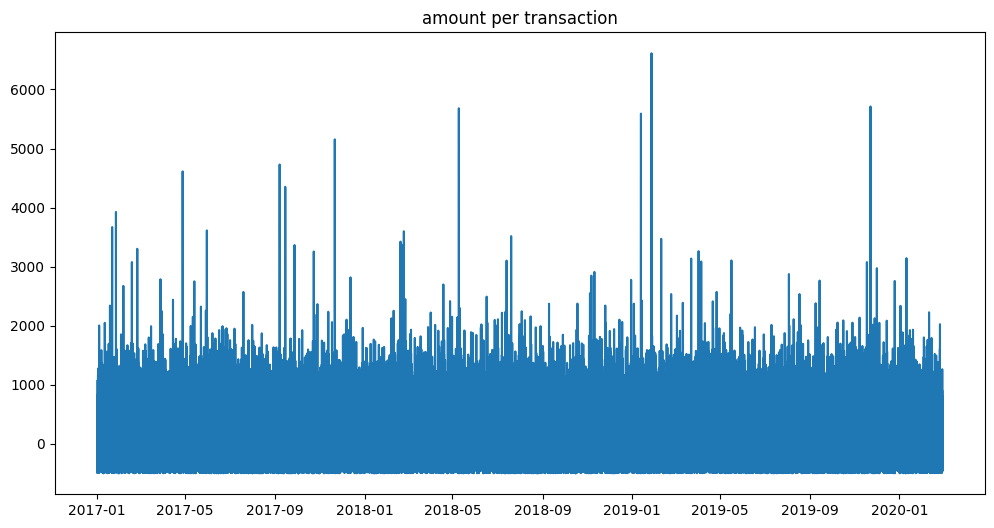

In [10]:
fig = plt.figure( figsize=(12, 6))
plt.plot(data['amount'])
plt.title('amount per transaction')

Text(0.5, 0.01, 'Transaction amount')

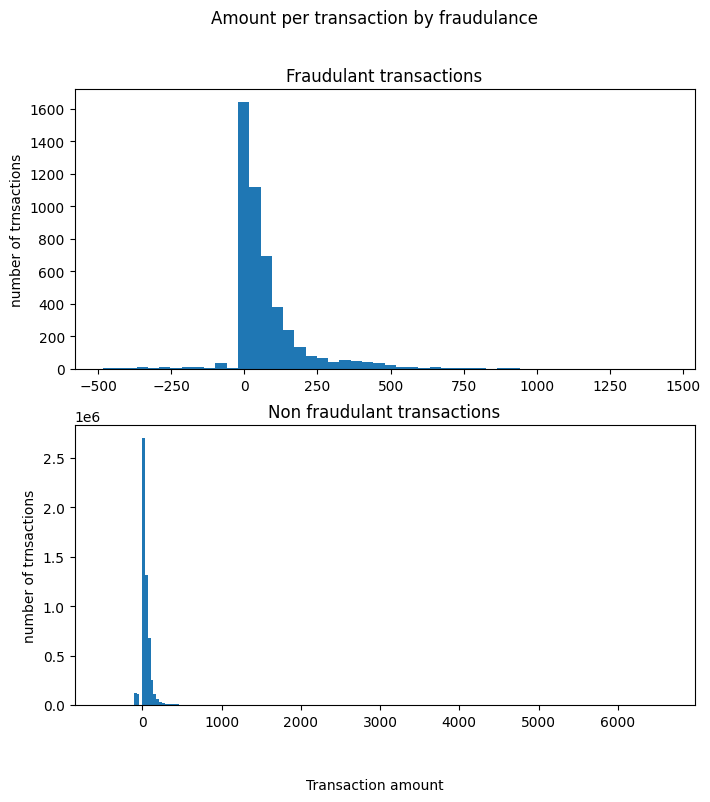

In [11]:
fraud = data.loc[data['is_fraud'] == 'Yes']
normal = data.loc[data['is_fraud'] == 'No']
fig, axs = plt.subplots(2, 1, sharex=False, figsize= (8, 8))
fig.suptitle('Amount per transaction by fraudulance')
axs[0].hist(fraud['amount'], bins = 50)
axs[0].set_title('Fraudulant transactions')
axs[0].set_ylabel('number of trnsactions')

axs[1].hist(normal['amount'], bins = 200)
axs[1].set_title('Legit transactions')
axs[1].set_ylabel('number of trnsactions')
fig.text(0.5, 0.01, 'Transaction amount', ha='center', va='center')

In [26]:
data.loc[(data['amount'] < 0.1) & (data['is_fraud'] == 'Yes' )]     # 276K transactions with negative amounts, 178 are fraud. 
normal['amount'].nlargest(5)              # there are several transactions with very large amounts of >5K that make the hist seem empty. fraud: max - 1442

date
2019-01-27 17:52:00    6613.44
2019-11-22 14:49:00    5712.06
2018-05-09 17:38:00    5682.22
2019-01-13 07:09:00    5591.73
2017-11-21 09:19:00    5155.36
Name: amount, dtype: float64

Text(0.02, 0.5, 'Aggregated amount per user')

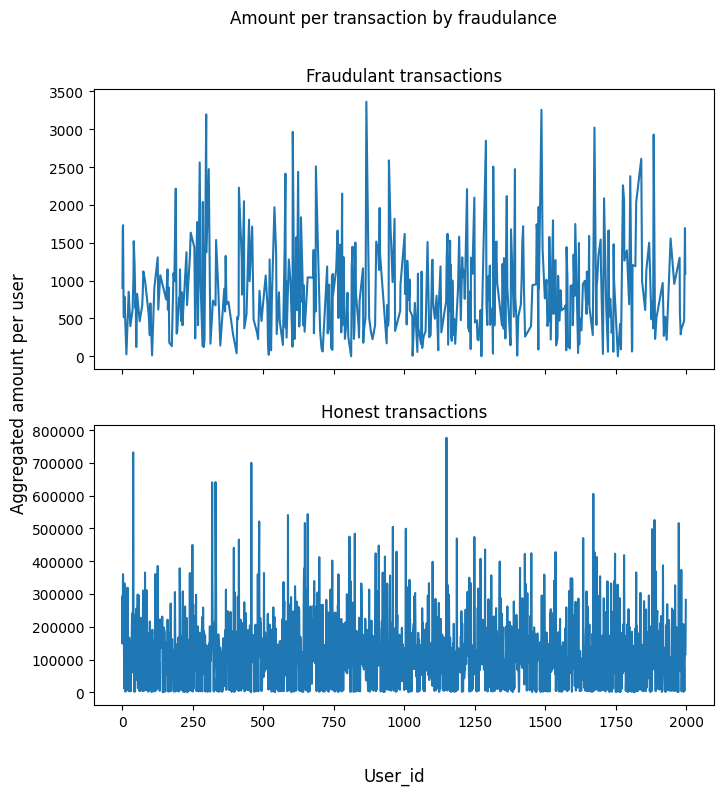

In [27]:
data['amount'].groupby(data['user']).sum()
fig, axs = plt.subplots(2, 1, sharex=True, figsize= (8, 8))
fig.suptitle('Amount per transaction by fraudulance')
axs[0].plot( fraud['amount'].groupby(fraud['user']).sum())
axs[0].set_title('Fraudulant transactions')
axs[1].plot(normal['amount'].groupby(normal['user']).sum())
axs[1].set_title('Honest transactions')

fig.supxlabel('User_id')
fig.supylabel('Aggregated amount per user')


Text(0.02, 0.5, 'Transaction amount')

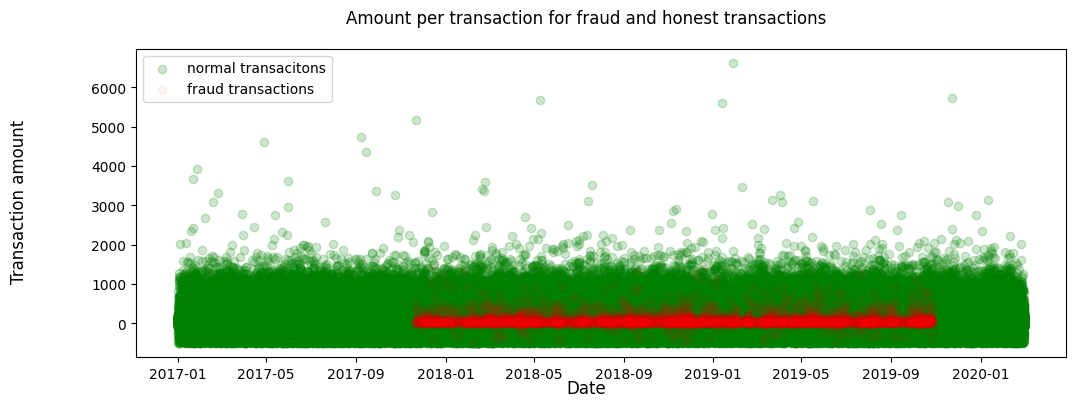

In [28]:
# fraud accross time

fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(normal.index, normal['amount'], color='g', alpha=0.2, label='normal transacitons')
ax.legend("Honest transactions")
ax.scatter(fraud.index, fraud['amount'],color='r', alpha=0.05, label='fraud transactions')
ax.legend()
fig.suptitle('Amount per transaction for fraud and honest transactions')
fig.supxlabel('Date')
fig.supylabel('Transaction amount')


Text(0, 0.5, 'Amount')

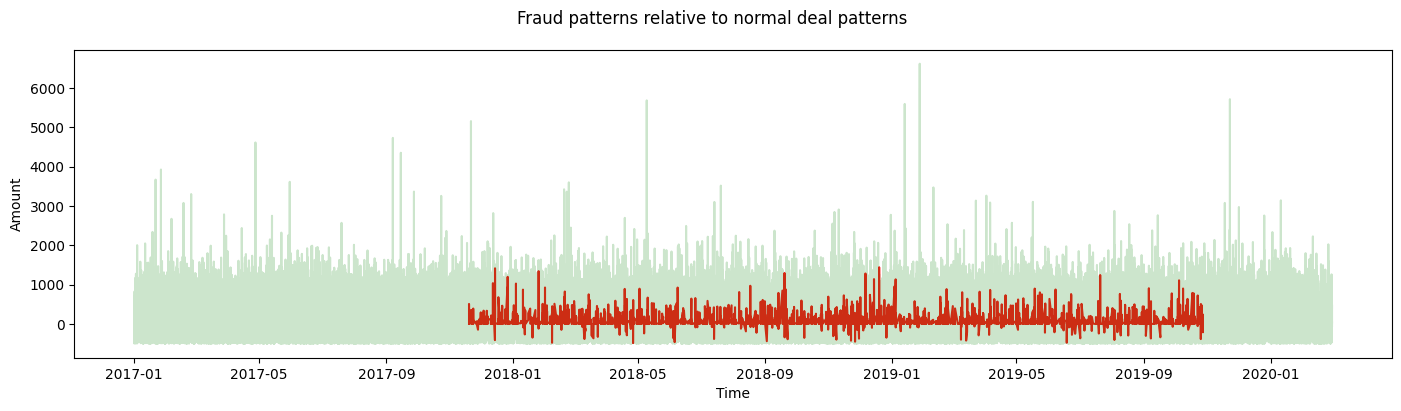

In [29]:
fig, ax = plt.subplots(figsize=(17, 4))
fig.suptitle('Fraud patterns relative to normal deal patterns')
ax.plot(fraud['amount'],color='r', alpha=0.9, label='Fraud')
ax.plot(normal['amount'], color='g', alpha=0.2, label='Normal')
ax.set_xlabel('Time')
ax.set_ylabel('Amount')

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  8.,  1.,  0.,
         6., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([131093.        , 132136.10526316, 133179.21052632, 134222.31578947,
        135265.42105263, 136308.52631579, 137351.63157895, 138394.73684211,
        139437.84210526, 140480.94736842, 141524.05263158, 142567.15789474,
        143610.26315789, 144653.36842105, 145696.47368421, 146739.57894737,
        147782.68421053, 148825.78947368, 149868.89473684, 150912.        ,
        151955.10526316, 152998.21052632, 154041.31578947, 155084.42105263,
        156127.52631579, 157170.63157895, 158213.73684211, 159256.84210526,
        160299.94736842, 161343.05263158, 162386.15789474, 163429.26315789,
        164472.36842105, 165515.47368421, 166558.57894737, 167601.68421053,
        168644.78947368, 169687.89473684, 170731.        ]),
 <BarContainer object of 38 artists>)

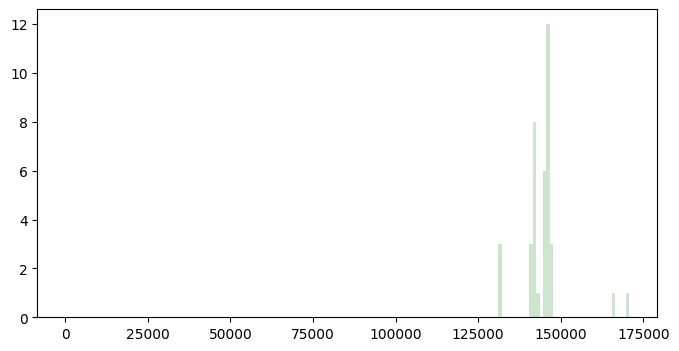

In [21]:
# number of transactions per month, legit and fraud
m_fraud = fraud[['amount']].groupby([fraud.index.month.rename('month'), fraud.index.year.rename('year')]).count()
m_normal = normal[['amount']].groupby([normal.index.month.rename('month'), normal.index.year.rename('year')]).count()
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(m_fraud, bins=m_fraud.shape[0], color='r')
ax.hist(m_normal, bins=m_normal.shape[0], color='g', alpha=0.2)

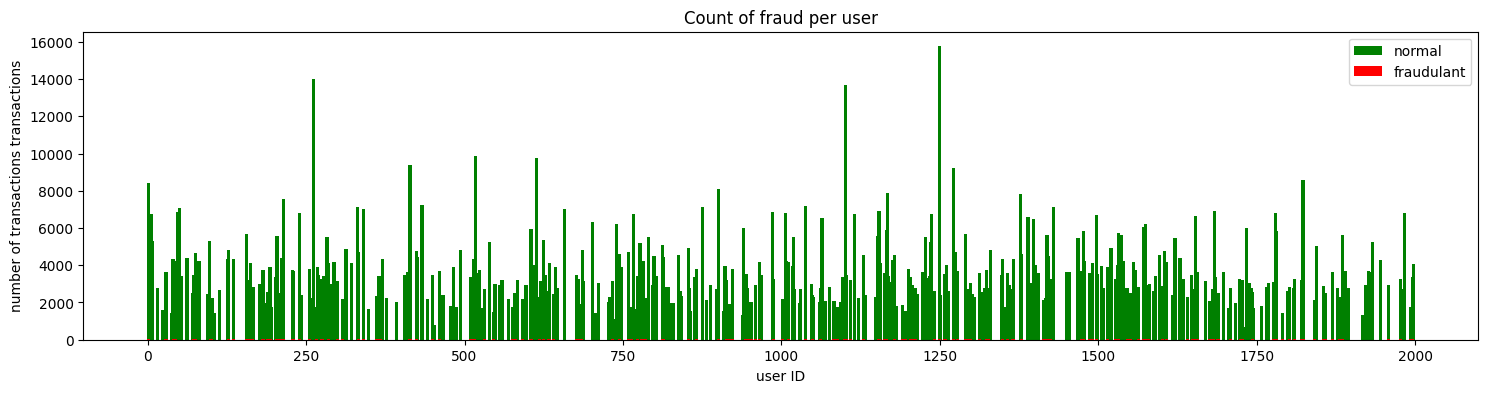

In [30]:
# users with more than one fraud: 
f_users = fraud[['user', 'amount']].groupby('user').count()
check_users = normal[['user', 'amount']].groupby('user').count()
norm_users = normal[['user', 'amount']].loc[normal['user'].isin(f_users.index) == True].groupby('user').count()
f = plt.subplots(figsize=(18, 4))
plt.title('Count of fraud per user')
plt.xlabel('user ID')
plt.ylabel('number of transactions transactions')
plt.bar(height=norm_users['amount'], x=norm_users.index, color='g', width=5, label='normal')
plt.bar(height=f_users['amount'], x=f_users.index, color='r', width=5, label='fraudulant')
plt.legend()



In [31]:

f_users.rename(columns={'amount': 'f_amount'}, inplace=True)
f_users
f_users['h_amount'] = norm_users['amount']

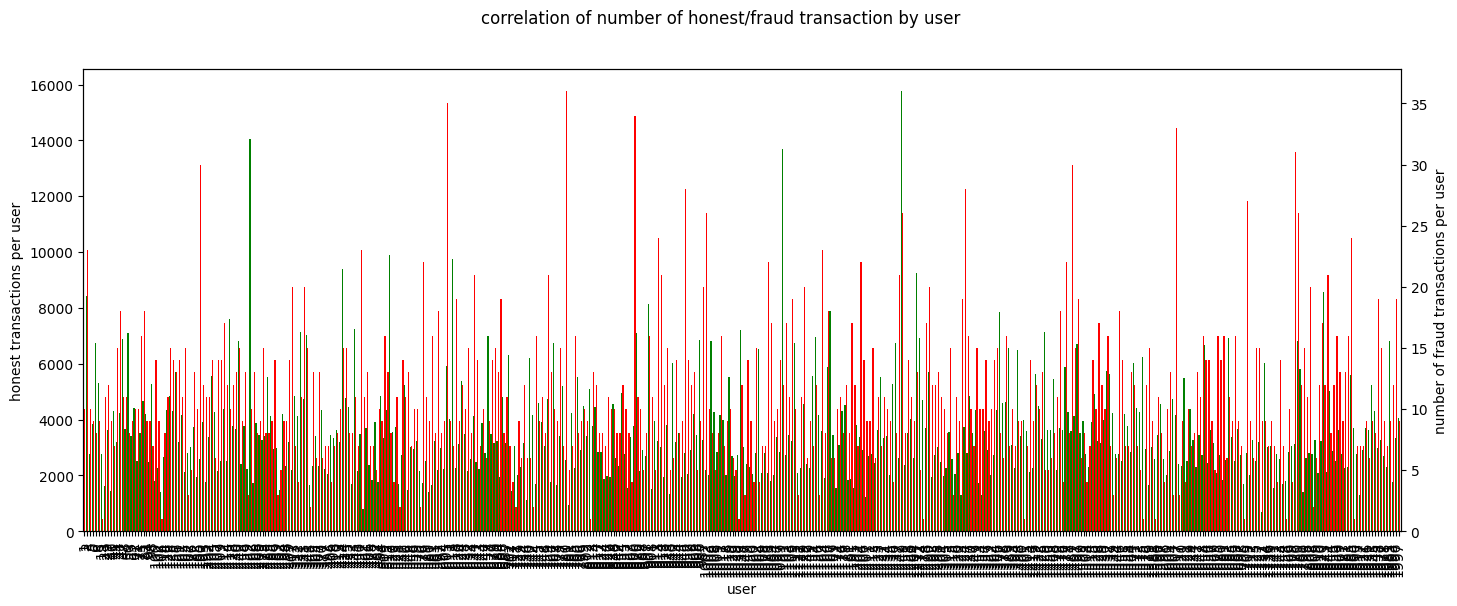

In [32]:
fig = plt.figure(figsize=(17,6)) 

ax = fig.add_subplot(1,1,1) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
fig.suptitle("correlation of number of legit/fraud transaction by user")
width = 0.4

f_users.h_amount.plot(kind='bar', color='green', ax=ax, width=width, position=1)
f_users.f_amount.plot(kind='bar', color='red', ax=ax2, width=width, position=0)

ax.set_ylabel('legit transactions per user')
ax2.set_ylabel('number of fraud transactions per user')

plt.show()

In [33]:
norm_users.shape, f_users.shape, check_users.shape, normal.shape, fraud.shape, data.shape

((443, 1), (443, 2), (1959, 1), (5500580, 11), (4833, 11), (5505413, 11))

### PCA - coding and normalizing 

Train tess split: since 2020 is not a full year, test data will be taken out of 2019. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [10]:
X = data.drop(columns=['is_fraud'])
y = data[['is_fraud']]

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                test_size=0.25, 
                                                random_state=42, 
                                                shuffle=True, 
                                                stratify=y)     #test size default 25%

In [39]:
Xtrain.shape

(4129059, 15)

In [12]:
Xtest.head()

,user,card,year,month,day,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors,hour,minute
date,,,,,,,,,,,,,,,
2017-01-13 14:32:00,1088,1,2017,1,13,240.00,Chip Transaction,-4282466774399734331,Middletown,DE,19709.0,4829,NaN,14,32
2018-02-01 09:04:00,423,1,2018,2,1,32.20,Chip Transaction,5763106017265139365,Findlay,OH,45840.0,5310,NaN,09,04
2017-06-08 06:19:00,1326,0,2017,6,8,6.17,Chip Transaction,964075827681628683,Grand Junction,CO,81506.0,5411,NaN,06,19
2017-03-08 11:25:00,235,1,2017,3,8,91.00,Chip Transaction,1799189980464955940,Garland,TX,75042.0,5499,NaN,11,25
2017-02-15 16:20:00,235,1,2017,2,15,0.00,Chip Transaction,-4282466774399734331,West Boylston,MA,1583.0,4829,NaN,16,20


In [14]:

label_enc = LabelEncoder()

# replace missing values with a constant text, then encode to numeric classes and scale
state_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='online')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler())])

# replace missing values with zero, then encode and scale
zero_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler())
])

# implement number scaler on numerical features (no missing values)
# implement text replacement to state and errors
# implement zero replacement to zip, city and chip
transformer= ColumnTransformer(
    transformers=[
        ('number_scaler', StandardScaler(), [0, 1, 2, 3, 4, 5, 7, 11, 13, 14]),
        ('NAN_replace_text', state_pipe, [9, 12]),
        ('NAN_replace_zero', zero_pipe, [6, 8, 10]),
        
    ], remainder='drop', verbose_feature_names_out=False)        # pipeline(memory='dirpath to cache)


In [15]:
ytrain = label_enc.fit_transform(ytrain)
transformer.fit(Xtrain)
Xtrain = transformer.transform(Xtrain)
Xtest = transformer.transform(Xtest)

/Users/inbalshalev/miniconda3/envs/tfjs/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
xtrain, xval = train_test_split(Xtrain, test_size=0.2, shuffle=False)
ytrain, yval = train_test_split(ytrain, test_size=0.2, shuffle=False)

In [18]:
xtrain.shape, ytrain.shape, xval.shape, yval.shape, Xtest.shape, ytest.shape

((3303247, 15),
 (3303247,),
 (825812, 15),
 (825812,),
 (1376354, 15),
 (1376354, 1))

In [19]:
# reshaping labels tensor to fit the model requirements of 2 dimensions
ytrain = ytrain.reshape(ytrain.shape[0], 1)
yval = yval.reshape(yval.shape[0], 1)


In [20]:
ytrain.ndim

2

Correlation matrix and distributions: 
(already at this phase it is presumed that the data is quite biased - 
looks like a fraud group from Rome, Italy found its way into the data and made many fraudulant 
transactions)

In [49]:
#import seaborn as sns
sns.set_style('darkgrid')

In [50]:
train_features = pd.DataFrame(xtrain, columns=X.columns).corr(method='spearman')

/var/folders/z3/3pn18rh502z1fqy_wcbjxnfc0000gn/T/ipykernel_17969/2671311189.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


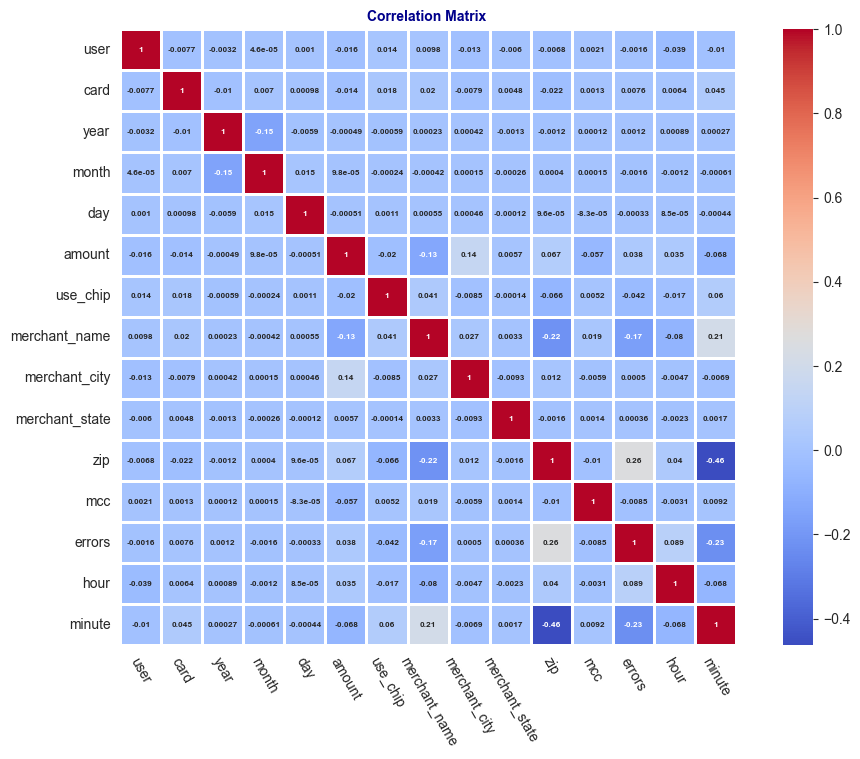

In [51]:
fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(train_features,
            cmap = "coolwarm",
            annot = True,
            annot_kws = {"fontsize":6, "fontweight":"bold"},
            square = True,
            linewidths = 1.0,
            linecolor = "white",
            ax = ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = -60)
ax.set_title('Correlation Matrix ', fontsize = 10, fontweight = 'bold', color = 'darkblue')
fig.show()



### Model Creation

In [21]:
import tensorflow as tf
from tensorflow import keras
import mlflow
import datetime
import os
import tempfile


2024-04-28 15:51:51.439597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
input_dim = Xtrain.shape[1]
input_dim, Xtrain.shape


(15, (4129059, 15))

In [111]:
METRICS = {
      'binary_crossentropy': keras.metrics.BinaryCrossentropy(name='binary_crossentropy'),  # same as model's loss
      'Brier_score': keras.metrics.MeanSquaredError(name='Brier_score'),
      'tp':keras.metrics.TruePositives(name='tp'),
      'fp':keras.metrics.FalsePositives(name='fp'),
      'tn':keras.metrics.TrueNegatives(name='tn'),
      'fn':keras.metrics.FalseNegatives(name='fn'), 
      'accuracy':keras.metrics.BinaryAccuracy(name='accuracy'),
      'precision':keras.metrics.Precision(name='precision'),
      'recall':keras.metrics.Recall(name='recall'),
      'auc':keras.metrics.AUC(name='auc'),
      'prc':keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
}


In [23]:
xtrain.shape[0] + xval.shape[0] + Xtest.shape[0], data.shape[0], xtrain.shape[-1]

(5505413, 5505413, 15)

In [115]:
def create_model(metrics=METRICS, output_bias=None):
    if output_bias:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.Input(shape=(xtrain.shape[-1],)),
        keras.layers.Dense(
            16,
            activation='relu',
        ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
                           bias_initializer=output_bias),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3,),
        loss=keras.losses.BinaryCrossentropy(),                 ### why does BinaryCrossentropy has a shape problem???????/
        metrics=list(metrics.values())
    )

    return model

In [116]:
EPOCHS = 100
BATCH_SIZE = 2048

eraly_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True
)

log_callback = tf.keras.callbacks.TensorBoard(#log_dir=logdir, 
                                    write_graph=True, 
                                    histogram_freq=1)

In [117]:
params = {
    'EPOCHS' : 100,
    'BATCH_SIZE': 2048,
    #'callbacks': [eraly_stopping, log_callback]
    }

In [118]:
model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                256       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
#from keras.utils import plot_model
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
# testrun before training
model.predict(xtrain[:10]).ndim


1/1 [==============================] - 0s 25ms/step


2

In [41]:
results = model.evaluate(xtrain, ytrain, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 1.5932


set an initial bias percentage in order to offset the bias in the data.
This will be smoothed out with a log, which will decrease the inherant loss at the start

In [119]:
neg, pos = np.bincount(label_enc.transform(y))
sum = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    sum, pos, 100 * pos / sum))


/Users/inbalshalev/miniconda3/envs/tfjs/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Examples:
    Total: 5505413
    Positive: 4833 (0.09% of total)



In [120]:
# set initial bias (ofsetting the effect of biased dataset with less than 1% fraud cases)
initial_bias = np.log([pos/neg])
initial_bias

array([-7.03714143])

In [121]:
model = create_model(output_bias=initial_bias)
model.predict(xtrain[:10])

1/1 [==============================] - 0s 60ms/step


array([[0.00055649],
       [0.0014019 ],
       [0.00080282],
       [0.00411698],
       [0.00147361],
       [0.00160864],
       [0.00121345],
       [0.00109007],
       [0.00120034],
       [0.00077869]], dtype=float32)

In [122]:
results = model.evaluate(xtrain, ytrain, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 0.0071


In [123]:
# checkpoint weights
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights.weights.h5')
model.save_weights(initial_weights)


In [ ]:
# create model from the saved weights, with initial bias 0
model = create_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    xtrain,
    ytrain,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(xval, yval),
    verbose=1
)

In [ ]:
# model from saved weights with initial bias set.
model = create_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    xtrain,
    ytrain,
    batch_size=params['BATCH_SIZE'],
    epochs=10,
    validation_data=(xval, yval),
    verbose=1,
    callbacks=[log_callback]
)

In [ ]:
careful_bias_history.history.keys()
careful_bias_history.history['accuracy']


In [54]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [55]:
def plot_loss(history, label, n):
    plt.semilogy(history.epoch, history.history['loss'],
                 color=colors[n], label='Train' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
                 color=colors[n], label='val' + label,
                 linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


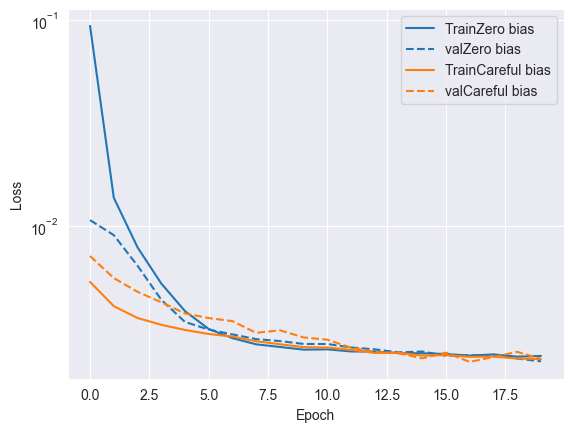

In [56]:
plot_loss(zero_bias_history, 'Zero bias', 0)
plot_loss(careful_bias_history, 'Careful bias', 1)

### Training

In [140]:
# names for MLFLOW runs
experiment = 'baseline'
run_name = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
logdir = os.path.join("logs", experiment, run_name)
os.makedirs(logdir, exist_ok=True)


model = create_model()
model.load_weights(initial_weights)



with mlflow.start_run(run_name=run_name) as run: 
    mlflow.set_experiment_tag('baseline', 'fraud_analysis')    

    baseline_history = model.fit(
        xtrain,
        ytrain,
        batch_size=params['BATCH_SIZE'],
        epochs=params['EPOCHS'],
        callbacks=[eraly_stopping, log_callback],
        validation_data=(xval, yval)
    )
    run_id = run.info.run_id

Epoch 1/100
1613/1613 [==============================] - 10s 5ms/step - loss: 0.0057 - binary_crossentropy: 0.0049 - Brier_score: 7.9388e-04 - tp: 115.0000 - fp: 92.0000 - tn: 4125342.0000 - fn: 3510.0000 - accuracy: 0.9991 - precision: 0.5556 - recall: 0.0317 - auc: 0.7734 - prc: 0.1579 - val_loss: 0.0045 - val_binary_crossentropy: 0.0045 - val_Brier_score: 8.7121e-04 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 825073.0000 - val_fn: 739.0000 - val_accuracy: 0.9991 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9490 - val_prc: 0.1178
Epoch 2/100
1613/1613 [==============================] - 8s 5ms/step - loss: 0.0045 - binary_crossentropy: 0.0045 - Brier_score: 8.5264e-04 - tp: 11.0000 - fp: 92.0000 - tn: 3300269.0000 - fn: 2875.0000 - accuracy: 0.9991 - precision: 0.1068 - recall: 0.0038 - auc: 0.8821 - prc: 0.0659 - val_loss: 0.0036 - val_binary_crossentropy: 0.0036 - val_Brier_score: 8.4182e-04 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 825073.0000

### Evaluation

In [133]:

with mlflow.start_run(run_name=run_name) as run:
    mlflow.set_experiment_tag('baseline', 'fraud_analysis')
    mlflow.set_tag("optimizer", 'keras.optimizer.Adam')
    mlflow.set_tag("loss", "binary_cross_entropy")

    mlflow.keras.log_model(model, "model")

    mlflow.log_params(params)
    #mlflow.log_metrics(METRICS)
    for key, value in METRICS.items(): 
        mlflow.log_metric(key, value)
    mlflow.log_artifact("model.png", "model_plot")

    run_id = run.info.run_id
    print("MLFlow Run ID: ", run_id)

2024/04/29 13:18:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/z3/3pn18rh502z1fqy_wcbjxnfc0000gn/T/tmpsh7lcmrf/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/z3/3pn18rh502z1fqy_wcbjxnfc0000gn/T/tmpsh7lcmrf/model/data/model/assets


TypeError: float() argument must be a string or a number, not 'BinaryCrossentropy'

In [58]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    fig = plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        name = metric.replace("_", " ")
        plt.subplot(2, 2, i+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle='--', label="val")
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8, 1])
        else:
            plt.ylim([0, 1])

        plt.legend()

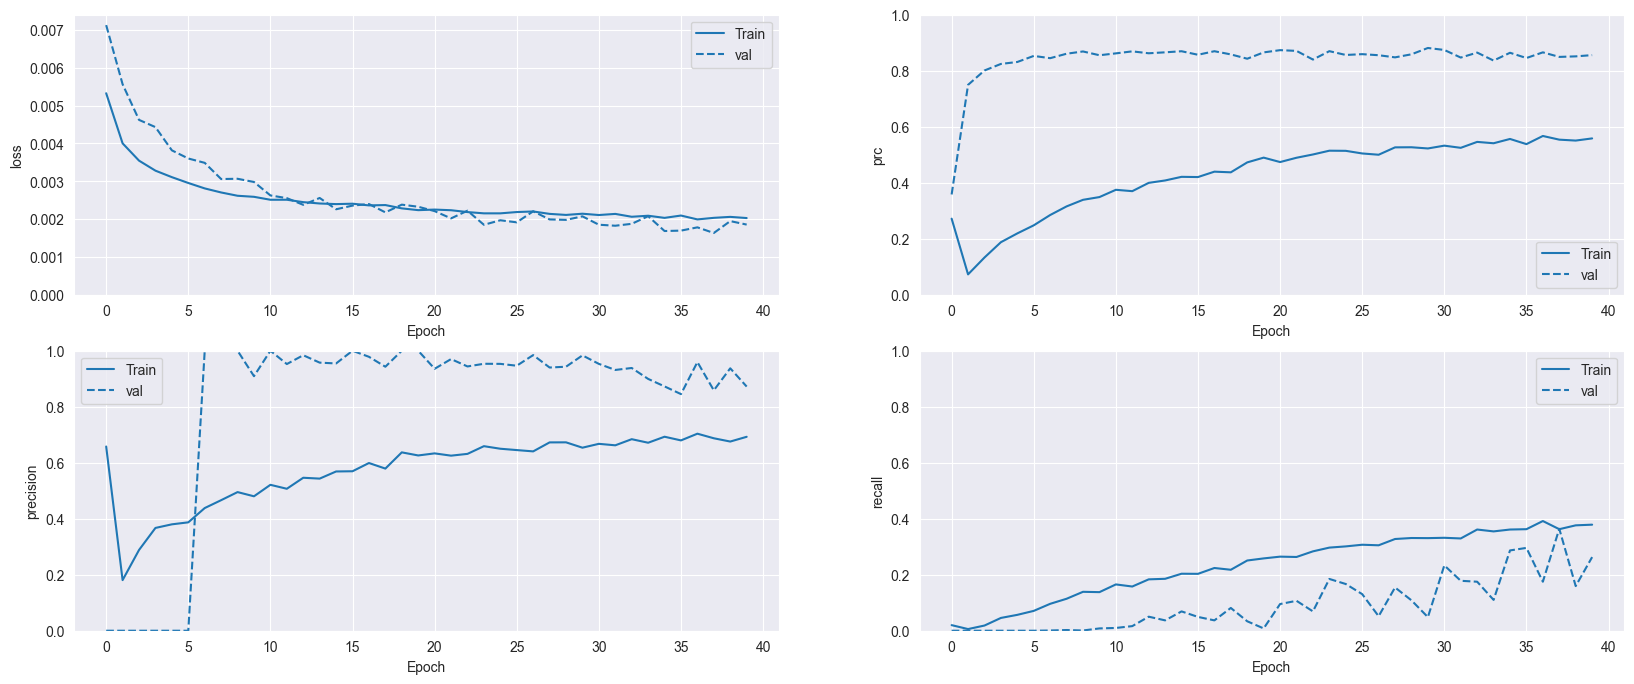

In [59]:
plot_metrics(baseline_history)

In [60]:
train_pred_baseline = model.predict(xtrain, batch_size=BATCH_SIZE)
test_pred_baseline = model.predict(Xtest, batch_size=BATCH_SIZE)

673/673 [==============================] - 1s 1ms/step


In [61]:
ytest = label_enc.transform(ytest)
ytest = ytest.reshape(ytest.shape[0], 1)
ytest.ndim

/Users/inbalshalev/miniconda3/envs/tfjs/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


2

In [63]:
def plot_cm(labels, predictions, threshold=0.5):
    cm = confusion_matrix(labels, predictions > threshold)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion matrix @{threshold:.2f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    print('Legit transactions detected (True neg):', cm[0][0])
    print('Legit transactions incorrect detected (False pos):', cm[0][1])
    print('Fraud transactions missed (False neg):', cm[1][0])
    print('Fraud transactions detected (True Pos):', cm[1][1])
    print('Total fraud transactions:', np.sum(cm[1]))

673/673 [==============================] - 1s 2ms/step - loss: 0.0011 - cross entropy: 0.0011 - Brier score: 4.0501e-04 - tp: 57.0000 - fp: 1.0000 - tn: 1375277.0000 - fn: 1019.0000 - accuracy: 0.9993 - precision: 0.9828 - recall: 0.0530 - auc: 0.9999 - prc: 0.8557
loss :  0.0010817935690283775
cross entropy :  0.0010817935690283775
Brier score :  0.00040501364856027067
tp :  57.0
fp :  1.0
tn :  1375277.0
fn :  1019.0
accuracy :  0.9992589354515076
precision :  0.982758641242981
recall :  0.05297397822141647
auc :  0.9999229311943054
prc :  0.8556704521179199

Legit transactions detected (True neg): 1375277
Legit transactions incorrect detected (False pos): 1
Fraud transactions missed (False neg): 1019
Fraud transactions detected (True Pos): 57
Total fraud transactions: 1076


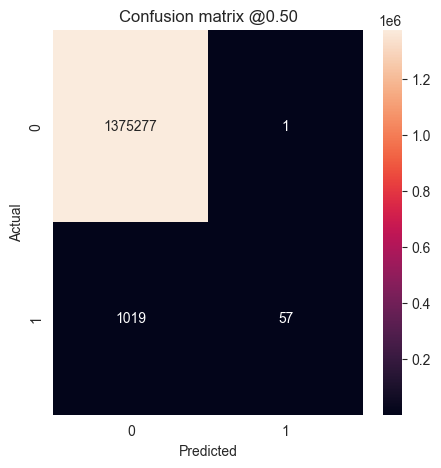

In [64]:
baseline_results = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE, verbose=1)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()
plot_cm(ytest, test_pred_baseline)

Legit transactions detected (True neg): 1374971
Legit transactions incorrect detected (False pos): 307
Fraud transactions missed (False neg): 4
Fraud transactions detected (True Pos): 1072
Total fraud transactions: 1076
Legit transactions detected (True neg): 1374707
Legit transactions incorrect detected (False pos): 571
Fraud transactions missed (False neg): 0
Fraud transactions detected (True Pos): 1076
Total fraud transactions: 1076


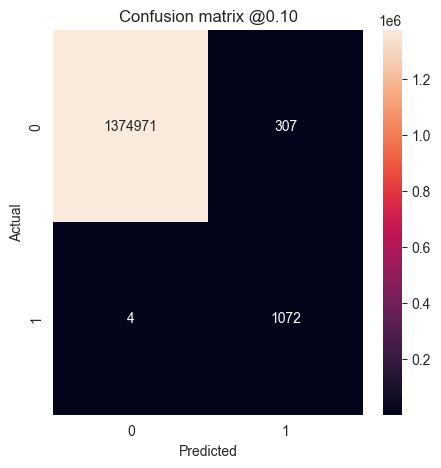

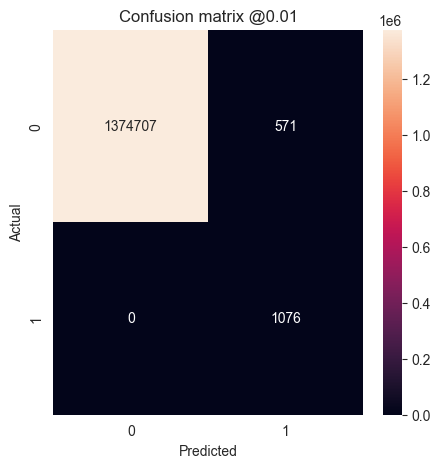

In [65]:
plot_cm(ytest, test_pred_baseline, threshold=0.1)
plot_cm(ytest, test_pred_baseline, threshold=0.01)

In [111]:
#ROC - Receiver Operator Characteristic- 
#TPR vs FPR at various threshold values: separates the 'signal' from the 'noise'.)
#true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis
def plot_roc(name, labels, preds, **kwargs):        
    fpr, tpr, _ = metrics.roc_curve(labels, preds)            # _ for thresholds
    #metrics.RocCurveDisplay.from_predictions(labels, preds, pos_label= 'Detected Fraud', name=name)
    print(len(fpr))
   
    print(len(tpr))
    plt.plot(100*fpr, 100*tpr, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,25])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

    return fpr, tpr

    


[0.         0.         0.         ... 0.71416639 0.71416669 1.        ]


438870
438870
123037
123037


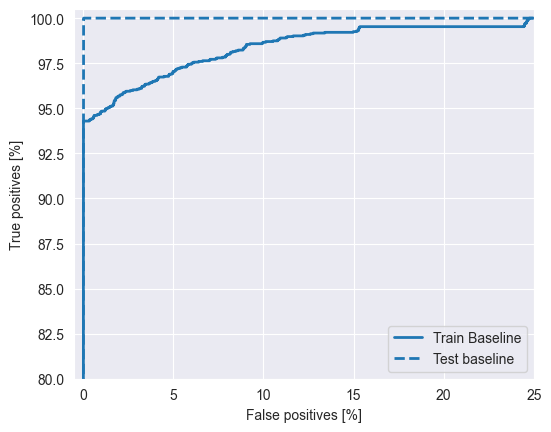

In [112]:
train_fp, train_tp = plot_roc('Train Baseline', ytrain, train_pred_baseline, color=colors[0])
test_fp, test_tp = plot_roc('Test baseline', ytest, test_pred_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

plot area under the curve: AUPRC - area under the percision-recall 

In [90]:
def plot_prc(name, labels, preds, **kwargs):
    precision, recall, _ = metrics.precision_recall_curve(labels, preds)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

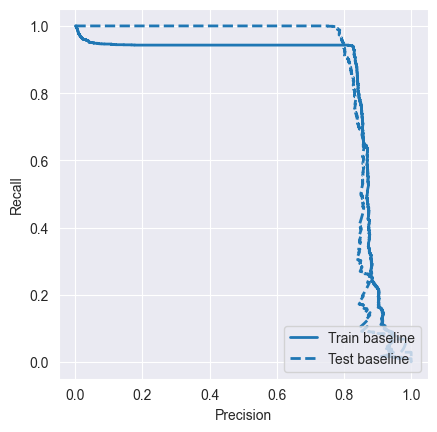

In [91]:
plot_prc('Train baseline', ytrain, train_pred_baseline, color=colors[0])
plot_prc('Test baseline', ytest, test_pred_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [92]:
weight_0 = (1 / neg) * (sum / 2.0)
weight_1 = (1 / pos) * (sum / 2.0)

class_weight = {0: weight_0, 1: weight_1}

print(f'weight class 0: {weight_0:.2f}')
print(f'weight class 1: {weight_1:.2f}')

weight class 0: 0.50
weight class 1: 569.56


Training with class weight: 

In [ ]:
weighted_model = create_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    xtrain,
    ytrain,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[eraly_stopping],
    validation_data=(xval, yval),
    class_weight=class_weight
)

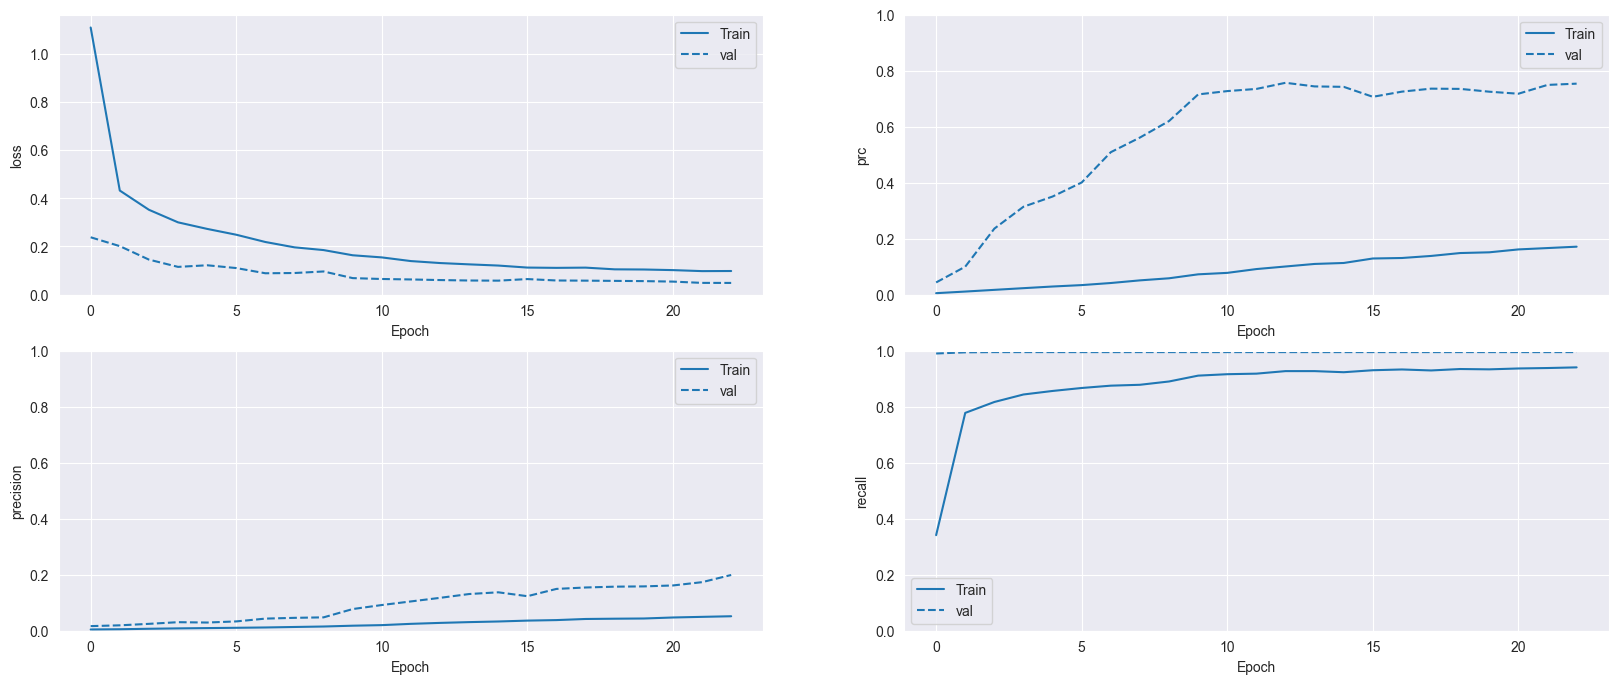

In [96]:
plot_metrics(weighted_history)

In [124]:
train_pred_weighted = weighted_model.predict(xtrain, batch_size=BATCH_SIZE)
test_pred_weighted = weighted_model.predict(Xtest, batch_size=BATCH_SIZE)

673/673 [==============================] - 1s 1ms/step


In [125]:
train_pred_baseline.shape, train_pred_weighted.shape

((3303247, 1), (3303247, 1))

In [126]:
weighted_results = weighted_model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE, verbose=0)

loss :  0.06233307346701622
cross entropy :  0.06233307346701622
Brier score :  0.014253773726522923
tp :  1076.0
fp :  16321.0
tn :  1358957.0
fn :  0.0
accuracy :  0.9881418347358704
precision :  0.061849743127822876
recall :  1.0
auc :  0.9998019337654114
prc :  0.7081114649772644

Legit transactions detected (True neg): 1358957
Legit transactions incorrect detected (False pos): 16321
Fraud transactions missed (False neg): 0
Fraud transactions detected (True Pos): 1076
Total fraud transactions: 1076


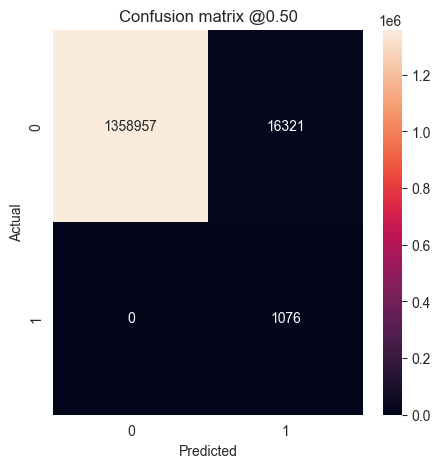

In [127]:
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
print()
plot_cm(ytest, test_pred_weighted)

438870
438870
123037
123037
417452
417452
113520
113520


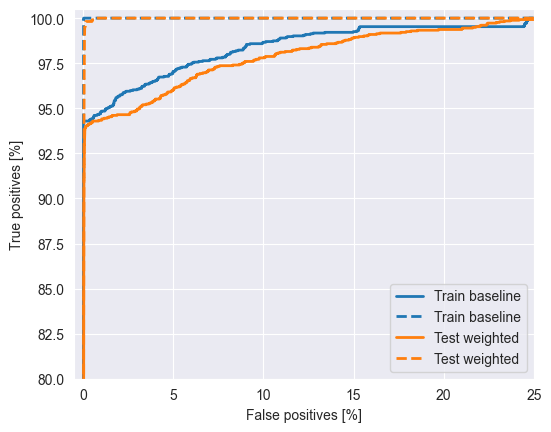

In [129]:
plot_roc('Train baseline', ytrain, train_pred_baseline, color=colors[0])
plot_roc('Train baseline', ytest, test_pred_baseline, color=colors[0], linestyle='--')

plot_roc('Test weighted', ytrain, train_pred_weighted, color=colors[1])
plot_roc('Test weighted', ytest, test_pred_weighted, color=colors[1], linestyle='--')

plt.legend(loc='lower right')

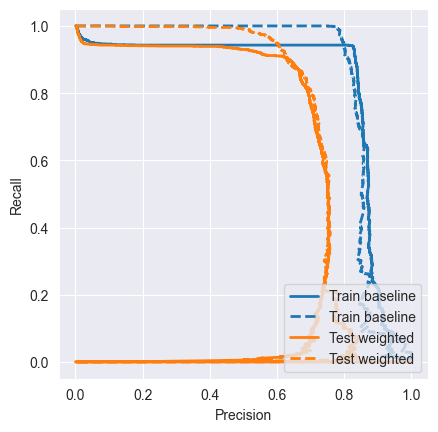

In [130]:
plot_prc('Train baseline', ytrain, train_pred_baseline, color=colors[0])
plot_prc('Train baseline', ytest, test_pred_baseline, color=colors[0], linestyle='--')

plot_prc('Test weighted', ytrain, train_pred_weighted, color=colors[1])
plot_prc('Test weighted', ytest, test_pred_weighted, color=colors[1], linestyle='--')

plt.legend(loc='lower right')